In [19]:
import matplotlib.pyplot as plt
import scienceplots


import numpy as np
import scipy.stats
import pandas as pd

import datetime

import sqlalchemy as sqla

from pathlib import Path

In [2]:
plt.style.use(['science','no-latex'])

In [5]:
ids_jogadores = np.arange(1, 40000+1, dtype=int)

In [8]:
dist_inicio_sessao = scipy.stats.norm(43200,7200)
ids_jogadores_sessoes = np.random.choice(ids_jogadores, np.int32(np.floor(5000)))
ids_sessoes = np.arange(1,5000+1,dtype=np.int32)
so_sessoes = np.random.choice(['Windows', 'Mac', 'Linux'], p=[0.7, .25, .05], size=5000)
trilhas = np.random.choice(['Facil', 'Medio', 'Dificil'], p=[0.5, .3, .2], size=5000)
versoes = np.random.choice(['2.0.0', '2.1.0'], p=[0.9, .1], size=5000)
horarios = dist_inicio_sessao.rvs(5000)


In [9]:
dia = datetime.datetime.fromisoformat('2025-02-24')
arr=[]
for i in range(ids_sessoes.size):
    id_sessao = ids_sessoes[i]
    id_jogador = ids_jogadores_sessoes[i]
    so_sessao = so_sessoes[i]
    trilha = trilhas[i]
    versao_jogo = versoes[i]
    ts_criacao = dia + datetime.timedelta(seconds=horarios[i])
    arr.append([id_sessao, id_jogador, so_sessao, trilha, ts_criacao, versao_jogo])

df_sessoes = pd.DataFrame(arr, columns=['id_sessao','id_jogador','so_sessao','trilha','ts_criacao','versao_jogo']).set_index('id_sessao')


In [10]:
dtypes={'trilha': 'object', 'nivel': np.int32, 
           'prob_conclusao': np.float64, 'prob_continuar':np.float64}
df_prob = pd.DataFrame(np.array([
    ['Facil', 1, 0.97, 0.99],
    ['Facil', 2, 0.97, 0.99],
    ['Facil', 3, 0.95, 0.99],
    ['Facil', 4, 0.95, 0.99],
    ['Facil', 5, 0.93, 0.99],
    ['Medio', 1, 0.97, 0.99],
    ['Medio', 2, 0.97, 0.99],
    ['Medio', 3, 0.95, 0.99],
    ['Medio', 4, 0.95, 0.99],
    ['Medio', 5, 0.93, 0.99],
    ['Medio', 6, 0.90, 0.99],
    ['Medio', 7, 0.90, 0.99],
    ['Medio', 8, 0.85, 0.99],
    ['Dificil', 1, 0.97, 0.99],
    ['Dificil', 2, 0.97, 0.99],
    ['Dificil', 3, 0.95, 0.99],
    ['Dificil', 4, 0.95, 0.99],
    ['Dificil', 5, 0.93, 0.99],
    ['Dificil', 6, 0.90, 0.99],
    ['Dificil', 7, 0.90, 0.99],
    ['Dificil', 8, 0.85, 0.99], 
    ['Dificil', 9, 0.85, 0.99], 
    ['Dificil', 10, 0.80, 0.99], 
    ['Dificil', 11, 0.80, 0.99], 
    ['Dificil', 12, 0.77, 0.99], 
    ['Dificil', 13, 0.70, 0.99]
]), columns=['trilha','nivel','prob_conclusao','prob_continuar'])
df_prob = df_prob.astype(dtype=dtypes).set_index(['trilha','nivel'])



In [25]:
arquivo = Path("../data/eventos_sessao.csv")


In [11]:
Path("../data/eventos_sessao.csv").unlink()
arr = []
dist_tempo_nivel = scipy.stats.norm(loc=60,scale=10)
for index, row in df_sessoes.reset_index().iterrows():
    # if index > 2: break
    id_sessao = row['id_sessao']
    trilha = row['trilha']
    ts_evento = row['ts_criacao']
    for nivel, (p_concluir, p_continuar) in df_prob.loc[trilha,:].iterrows():
        # print(id_sessao, trilha, nivel, ts_evento, 'I')
        arr.append([id_sessao, ts_evento, nivel, 'I'])
        if np.random.random_sample() < p_concluir:
            ts_evento += + datetime.timedelta(seconds=dist_tempo_nivel.rvs())
            # print(id_sessao, trilha, nivel, ts_evento, 'F')
            arr.append([id_sessao, ts_evento, nivel, 'F'])
        if np.random.random_sample() < (1-p_continuar):
            break
        ts_evento += + datetime.timedelta(seconds=10)

df_eventos = pd.DataFrame(arr, columns=['id_sessao','ts_evento','nivel','indicador'])

In [18]:
# df_eventos.head().to_csv("../data/eventos_temp.csv",mode='a', index=False)
df_eventos.head().to_csv("../data/eventos_temp.csv",mode='a', index=False, header=False)

# Gráficos

In [313]:
df2=df.groupby([
    df['ts_criacao'].dt.floor('30min'),
    df['so_sessao'],
    df['trilha'],
    df['versao_jogo']
]).count()


<Axes: xlabel='ts_criacao'>

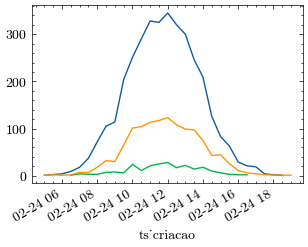

In [332]:
df2.loc[:,'Windows',:,:]['id_sessao'].groupby(axis=0, level=[0]).sum().plot()
df2.loc[:,'Linux',:,:]['id_sessao'].groupby(axis=0, level=[0]).sum().plot()
df2.loc[:,'Mac',:,:]['id_sessao'].groupby(axis=0, level=[0]).sum().plot()
# df2.loc[:,'Windows','Medio','2.1.0']['id_sessao'].plot()
# df2.loc[:,'Windows','Dificil','2.1.0']['id_sessao'].plot()
# plt.legend()